## 1.Importing Needed Libraries to start our task

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

## 2.Importing Data and EDA

In [92]:
Breast_Data = '/content/data.csv'

In [93]:
def wrangle(Breast_Data):
    # Read the data with a solemn announcement
    print("\033[1;35m🌟 Embarking on a Clinical Odyssey: Unveiling the Mysteries of the Breast Cancer Dataset! 🌟\033[0m")
    Breast_Data = pd.read_csv(Breast_Data)

    # Displaying the initial clinical observations
    print("\n\033[1m🔍 Clinical Overview: The First 10 Rows - A Prelude to the Data Exploration\033[0m")
    print(Breast_Data.head(10).to_string(index=False))

    # Conducting a clinical examination of data types and missing values
    print("\n\033[1m🚀 Clinical Exploration: Navigating Data Types and Unveiling Hidden Values!\033[0m")
    print(Breast_Data.info(show_counts=True))

    # Providing a clinical insight into the dataset's statistics
    print("\n\033[1m📊 Clinical Illumination: A Statistical Insight into the Dataset!\033[0m")
    print(Breast_Data.describe().to_string())

    # Eliminating unnecessary columns with a clinical precision
    print("\n\033[1m🔪 Surgical Precision: Removing Unwanted Columns...\033[0m")
    Breast_Data.drop(columns=["id", "Unnamed: 32"], inplace=True)
    print("\033[1m✨ The Unwanted Columns 'id' and 'Unnamed: 32' have been Precisely Removed! ✨\033[0m")

    # A clinical summary of the triumphant data wrangling journey
    print("\n\033[1m🌟 Clinical Triumph: A Symphony of Victory in the World of Data Exploration! 🌟\033[0m")
    print("✅ The data has been Clinically Examined with Unyielding Precision.")
    print("✅ The Tapestry of Data Types and Missing Values has been Unraveled in a Clinical Odyssey.")
    print("✅ A Clinical Statistician's Insight into the Dataset has been Bestowed upon the Analytical Minds.")
    print("✅ The Unwanted Columns have been Surgically Vanquished with Precision.")
    print("✅ The Clinical Transformation of 'Diagnosis' is now Etched in the Annals of Data for Eternity!\n")

    return Breast_Data


In [94]:
Breast_Data_Frame = wrangle(Breast_Data=Breast_Data)

🌟 Embarking on a Clinical Odyssey: Unveiling the Mysteries of the Breast Cancer Dataset! 🌟

🔍 Clinical Overview: The First 10 Rows - A Prelude to the Data Exploration
      id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
  842302         M        17.99         10.38          122.80     1001.0          0.11840           0.27760         0.30010              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003          


📊 Clinical Insight: Proclamation of Patient Percentages 📊
✨ Percent of Benign Diagnoses: 63%
✨ Percent of Malignant Diagnoses: 37%


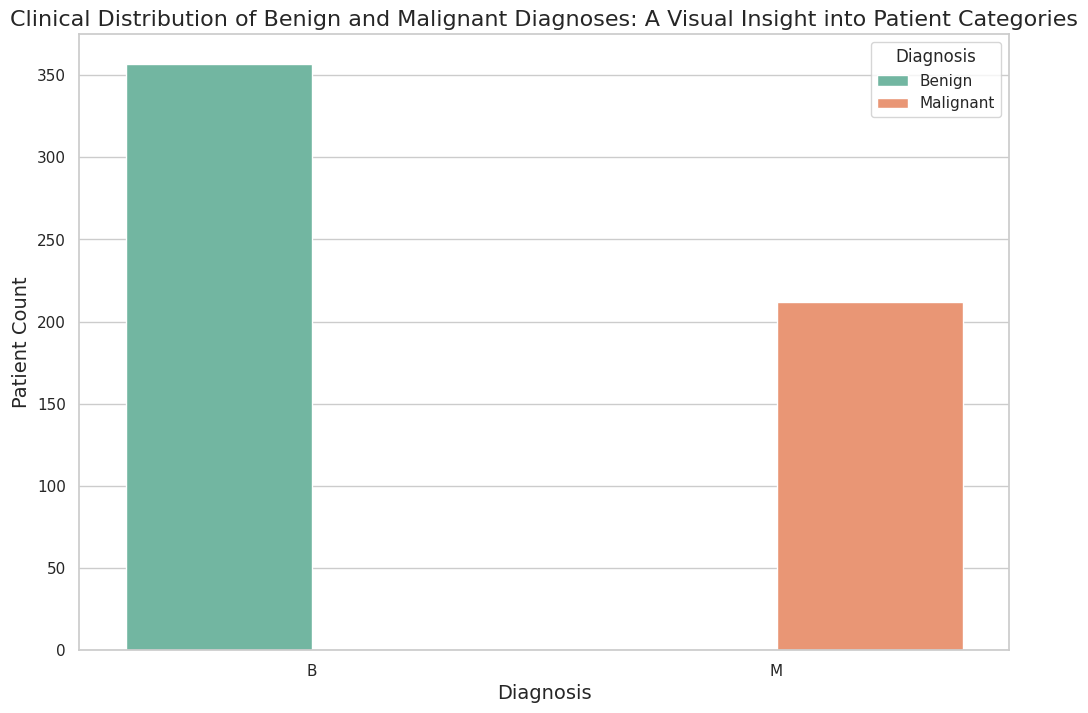

In [95]:
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set(style="whitegrid")

# Unveiling the distribution of benign and malignant diagnoses
benign_or_malignant = Breast_Data_Frame["diagnosis"].value_counts()
barplot = sns.barplot(x=benign_or_malignant.index, y=benign_or_malignant.values, hue=["Benign", "Malignant"], palette=["#66c2a5", "#fc8d62"])

# Adding a touch of clinical elegance to the plot
plt.title("Clinical Distribution of Benign and Malignant Diagnoses: A Visual Insight into Patient Categories", fontsize=16)
plt.xlabel("Diagnosis", fontsize=14)
plt.ylabel("Patient Count", fontsize=14)
plt.legend(title="Diagnosis")

# Displaying the clinical proclamation of percentages
print("\n\033[1m📊 Clinical Insight: Proclamation of Patient Percentages 📊\033[0m")
print(f"\033[1m✨ Percent of Benign Diagnoses:\033[0m {benign_or_malignant[0] / sum(benign_or_malignant.values) * 100:.0f}%")
print(f"\033[1m✨ Percent of Malignant Diagnoses:\033[0m {benign_or_malignant[1] / sum(benign_or_malignant.values) * 100:.0f}%")

# Displaying the clinical grand finale
plt.show()


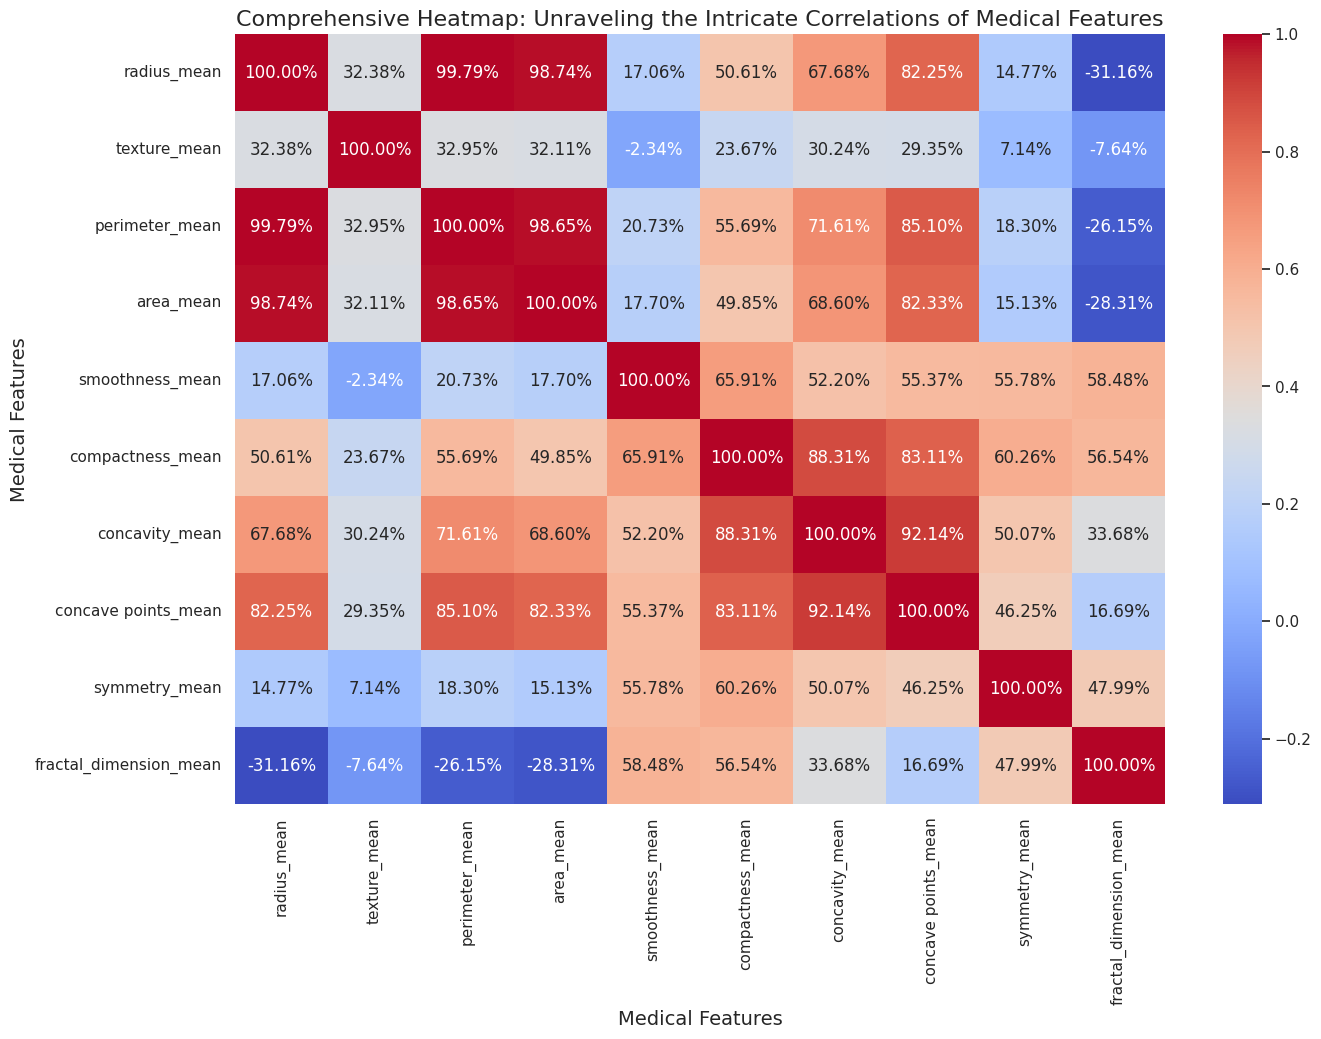

In [96]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Revealing the intricate correlations among medical features
correlation_matrix = Breast_Data_Frame.iloc[:, 1:11].corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2%", cmap="coolwarm")

# Adding a touch of clinical significance to the plot
plt.title("Comprehensive Heatmap: Unraveling the Intricate Correlations of Medical Features", fontsize=16)
plt.xlabel("Medical Features", fontsize=14)
plt.ylabel("Medical Features", fontsize=14)

# Displaying the insightful heatmap
plt.show()


## 3.1.Building Model With PCA

In [97]:
shuffled_data = Breast_Data_Frame.sample(frac=1,random_state=42)
features = shuffled_data.drop(columns=["diagnosis"])
target = shuffled_data["diagnosis"]
print(features.shape,target.shape,sep="\n")

(569, 30)
(569,)


In [98]:
# Print the number of columns before PCA
print(f"Data Before PCA: {features.shape[1]}")
# Apply PCA with 0.999 Variance
pca = PCA(0.999)
pca.fit(features)
features_PCA = pca.transform(features)
# Create a DataFrame with PCA components
pca_columns = [f'PCA{i}' for i in range(1, features_PCA.shape[1] + 1)]
features_PCA_df = pd.DataFrame(data=features_PCA, columns=pca_columns)
# Print the number of columns after PCA
print(f"Data After PCA: {features_PCA_df.shape[1]}")
# Display the new DataFrame
print(features_PCA_df.head())

Data Before PCA: 30
Data After PCA: 3
          PCA1        PCA2      PCA3
0  -263.623436  -42.768553  4.720700
1  1092.401048 -105.035759 -4.628682
2   284.948132  -62.392015 -7.948702
3  -410.186841   29.410370 -2.577956
4  -493.647933    3.930971  8.498568


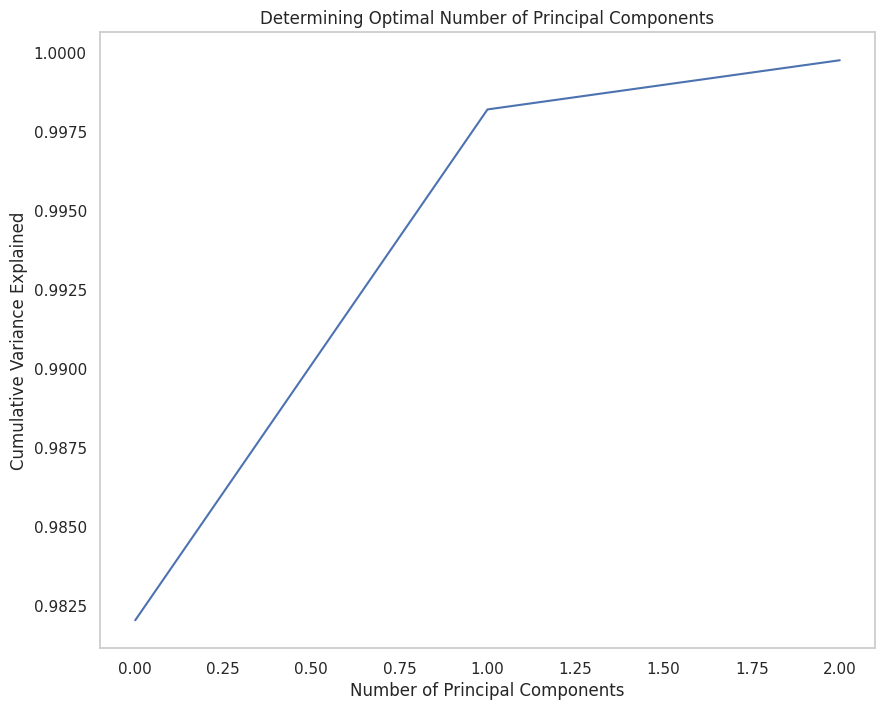

In [99]:
plt.figure(figsize=(10, 8))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Determining Optimal Number of Principal Components")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [100]:
X_train,X_test,y_train,y_test = train_test_split(features_PCA_df,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")

(455, 3)
(114, 3)
(455,)
(114,)


In [101]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [102]:
def Model(X_train, y_train):
    # 1- Logistic Regression
    LR = LogisticRegression(max_iter=1000, random_state=1)
    LR_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    LR_grid = GridSearchCV(LR, LR_params, cv=5)
    LR_grid.fit(X_train, y_train)
    best_LR_model = LR_grid.best_estimator_

    # 2- SVM
    SVM = SVC(random_state=7)
    SVM_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    SVM_grid = GridSearchCV(SVM, SVM_params, cv=5)
    SVM_grid.fit(X_train, y_train)
    best_SVM_model = SVM_grid.best_estimator_

    # 3- Decision Tree
    Tree = DecisionTreeClassifier(random_state=7, criterion="entropy")
    Tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    Tree_grid = GridSearchCV(Tree, Tree_params, cv=5)
    Tree_grid.fit(X_train, y_train)
    best_Tree_model = Tree_grid.best_estimator_

    # 4- Random Forest Classifier
    RFC = RandomForestClassifier(random_state=7, criterion="entropy")
    RFC_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    RFC_grid = GridSearchCV(RFC, RFC_params, cv=5)
    RFC_grid.fit(X_train, y_train)
    best_RFC_model = RFC_grid.best_estimator_

    # Print scores and best parameters for all models
    print(f"Score of Logistic Regression is {LR_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_LR_model}\'")
    print(f"Score of SVM is {SVM_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_SVM_model}\'")
    print(f"Score of Decision Tree is {Tree_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_Tree_model}\'")
    print(f"Score of Random Forest Classifier is {RFC_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_RFC_model}\'")

    return best_LR_model, best_SVM_model, best_Tree_model, best_RFC_model

In [103]:
final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model = Model(X_train, y_train)

Score of Logistic Regression is 94.29% and best parameters were 'LogisticRegression(C=100, max_iter=1000, random_state=1)'
Score of SVM is 94.51% and best parameters were 'SVC(C=1, random_state=7)'
Score of Decision Tree is 100.00% and best parameters were 'DecisionTreeClassifier(criterion='entropy', random_state=7)'
Score of Random Forest Classifier is 100.00% and best parameters were 'RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=7)'


In [104]:
def Test_Results(LR, SVM, TRE, RFC, X_test, y_test):
    # 1. LR Model Test Score
    Score_Of_LR = LR.score(X_test, y_test)
    print(f"LR Model Test Score: {Score_Of_LR:0.2%}")

    # 2. SVM Model Test Score
    Score_Of_SVM = SVM.score(X_test, y_test)
    print(f"SVM Model Test Score: {Score_Of_SVM:0.2%}")

    # 3. Decision Tree Model Test Score
    Score_Of_DT = TRE.score(X_test, y_test)
    print(f"Decision Tree Model Test Score: {Score_Of_DT:0.2%}")

    # 4. Random Forest Classifier Model Test Score
    Score_Of_RFC = RFC.score(X_test, y_test)
    print(f"Random Forest Classifier Model Test Score: {Score_Of_RFC:0.2%}")


In [105]:
Test_Results(final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model,X_test,y_test)

LR Model Test Score: 92.11%
SVM Model Test Score: 88.60%
Decision Tree Model Test Score: 89.47%
Random Forest Classifier Model Test Score: 91.23%


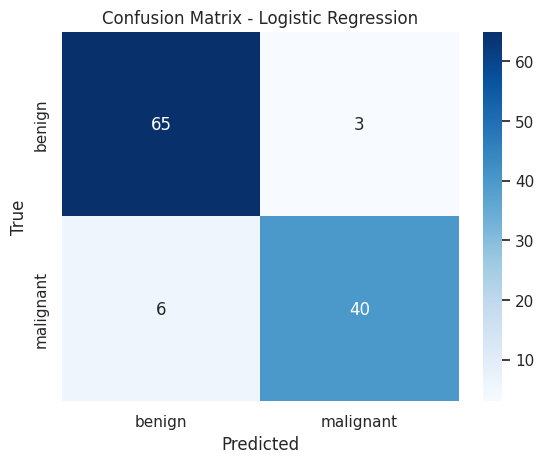

              precision    recall  f1-score   support

           B       0.92      0.96      0.94        68
           M       0.93      0.87      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



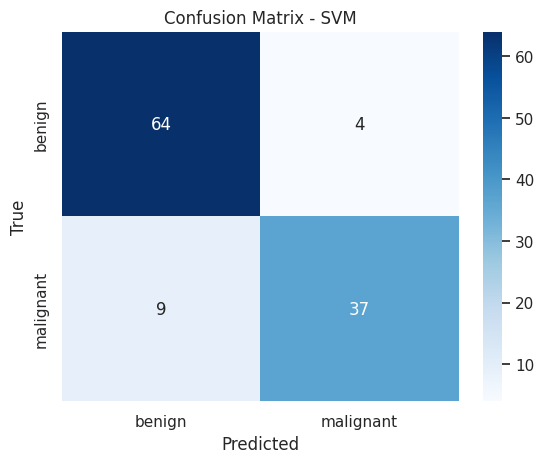

              precision    recall  f1-score   support

           B       0.88      0.94      0.91        68
           M       0.90      0.80      0.85        46

    accuracy                           0.89       114
   macro avg       0.89      0.87      0.88       114
weighted avg       0.89      0.89      0.88       114



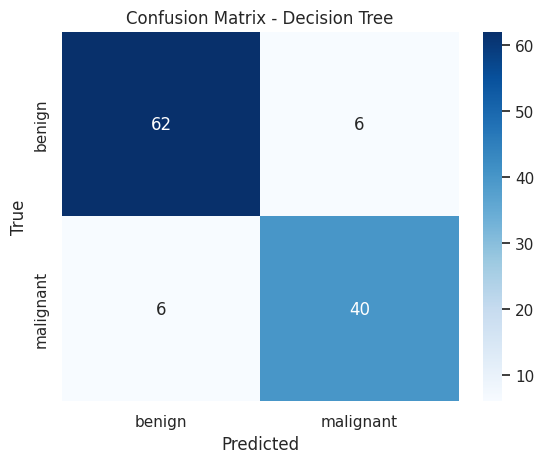

              precision    recall  f1-score   support

           B       0.91      0.91      0.91        68
           M       0.87      0.87      0.87        46

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



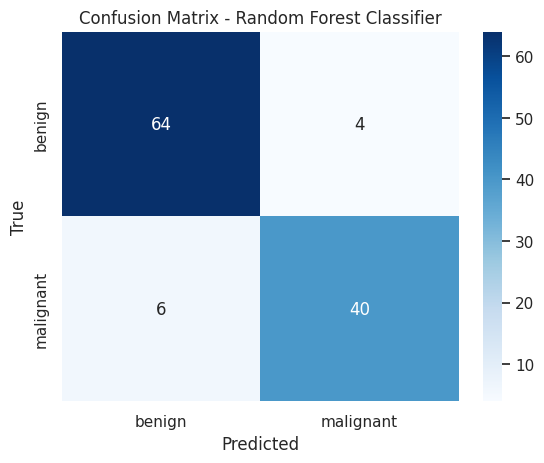

              precision    recall  f1-score   support

           B       0.91      0.94      0.93        68
           M       0.91      0.87      0.89        46

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [106]:
def Classification_Draw(models, X_test, y_test):
    # Define class names
    class_names = ['benign', 'malignant']

    for model, model_name in models:
        # Calculate the confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        print(classification_report(y_test,y_pred))

# Assuming you have a list of models and their names
models = [(final_LR_model, 'Logistic Regression'),
          (final_SVM_model, 'SVM'),
          (final_Tree_model, 'Decision Tree'),
          (final_RFC_model, 'Random Forest Classifier')]

# Call the function to generate confusion matrix plots
Classification_Draw(models, X_test, y_test)


## 3.2.Building Model With Kruskal-Wallis test

In [107]:
shuffled_data = Breast_Data_Frame.sample(frac=1,random_state=42)
features = shuffled_data.drop(columns=["diagnosis"])
target = shuffled_data["diagnosis"]
print(features.shape,target.shape,sep="\n")

(569, 30)
(569,)


In [108]:
num_cols = list(shuffled_data.select_dtypes('float64').columns)
def anova_analysis(df, num_cols, categorical_col='diagnosis', alpha=0.05):
    unrelated_num_cols = []

    for col in num_cols:
        grouped_data = [df[col][df[categorical_col] == category] for category in df[categorical_col].unique()]
        statistic, p_value = scipy.stats.f_oneway(*grouped_data)

        print(f"\nColumn: {col}")
        print(f"ANOVA statistic: {round(statistic, 2)} | p-value: {round(p_value,5)}")

        if p_value < alpha:
            print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {col} and {categorical_col}")
        else:
            print("\033[31m" + f"No significant relationship between {col} and {categorical_col}")
            unrelated_num_cols.append(col)

        print("\033[0m")  # Reset text color to default

    return unrelated_num_cols

unrelated_cols = anova_analysis(shuffled_data, num_cols)


Column: radius_mean
ANOVA statistic: 646.98 | p-value: 0.0
Reject the null hypothesis: There is a significant relationship between radius_mean and diagnosis


Column: texture_mean
ANOVA statistic: 118.1 | p-value: 0.0
Reject the null hypothesis: There is a significant relationship between texture_mean and diagnosis


Column: perimeter_mean
ANOVA statistic: 697.24 | p-value: 0.0
Reject the null hypothesis: There is a significant relationship between perimeter_mean and diagnosis


Column: area_mean
ANOVA statistic: 573.06 | p-value: 0.0
Reject the null hypothesis: There is a significant relationship between area_mean and diagnosis


Column: smoothness_mean
ANOVA statistic: 83.65 | p-value: 0.0
Reject the null hypothesis: There is a significant relationship between smoothness_mean and diagnosis


Column: compactness_mean
ANOVA statistic: 313.23 | p-value: 0.0
Reject the null hypothesis: There is a significant relationship between compactness_mean and diagnosis


Column: concavity_mean
AN

In [109]:
Rejected_Columns = ['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se']
New_Features = features.drop(columns=Rejected_Columns)

In [110]:
X_train,X_test,y_train,y_test = train_test_split(New_Features,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")

(455, 25)
(114, 25)
(455,)
(114,)


In [111]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [112]:
def Model(X_train, y_train):
    # 1- Logistic Regression
    LR = LogisticRegression(max_iter=1000, random_state=1)
    LR_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    LR_grid = GridSearchCV(LR, LR_params, cv=5)
    LR_grid.fit(X_train, y_train)
    best_LR_model = LR_grid.best_estimator_

    # 2- SVM
    SVM = SVC(random_state=7)
    SVM_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    SVM_grid = GridSearchCV(SVM, SVM_params, cv=5)
    SVM_grid.fit(X_train, y_train)
    best_SVM_model = SVM_grid.best_estimator_

    # 3- Decision Tree
    Tree = DecisionTreeClassifier(random_state=7, criterion="entropy")
    Tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    Tree_grid = GridSearchCV(Tree, Tree_params, cv=5)
    Tree_grid.fit(X_train, y_train)
    best_Tree_model = Tree_grid.best_estimator_

    # 4- Random Forest Classifier
    RFC = RandomForestClassifier(random_state=7, criterion="entropy")
    RFC_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    RFC_grid = GridSearchCV(RFC, RFC_params, cv=5)
    RFC_grid.fit(X_train, y_train)
    best_RFC_model = RFC_grid.best_estimator_

    # Print scores and best parameters for all models
    print(f"Score of Logistic Regression is {LR_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_LR_model}\'")
    print(f"Score of SVM is {SVM_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_SVM_model}\'")
    print(f"Score of Decision Tree is {Tree_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_Tree_model}\'")
    print(f"Score of Random Forest Classifier is {RFC_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_RFC_model}\'")

    return best_LR_model, best_SVM_model, best_Tree_model, best_RFC_model

In [113]:
final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model = Model(X_train, y_train)

Score of Logistic Regression is 98.68% and best parameters were 'LogisticRegression(C=1, max_iter=1000, random_state=1)'
Score of SVM is 98.24% and best parameters were 'SVC(C=0.1, kernel='linear', random_state=7)'
Score of Decision Tree is 99.12% and best parameters were 'DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=7)'
Score of Random Forest Classifier is 100.00% and best parameters were 'RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)'


In [114]:
def Test_Results(LR, SVM, TRE, RFC, X_test, y_test):
    # 1. LR Model Test Score
    Score_Of_LR = LR.score(X_test, y_test)
    print(f"LR Model Test Score: {Score_Of_LR:0.2%}")

    # 2. SVM Model Test Score
    Score_Of_SVM = SVM.score(X_test, y_test)
    print(f"SVM Model Test Score: {Score_Of_SVM:0.2%}")

    # 3. Decision Tree Model Test Score
    Score_Of_DT = TRE.score(X_test, y_test)
    print(f"Decision Tree Model Test Score: {Score_Of_DT:0.2%}")

    # 4. Random Forest Classifier Model Test Score
    Score_Of_RFC = RFC.score(X_test, y_test)
    print(f"Random Forest Classifier Model Test Score: {Score_Of_RFC:0.2%}")


In [115]:
Test_Results(final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model,X_test,y_test)

LR Model Test Score: 95.61%
SVM Model Test Score: 95.61%
Decision Tree Model Test Score: 92.11%
Random Forest Classifier Model Test Score: 93.86%


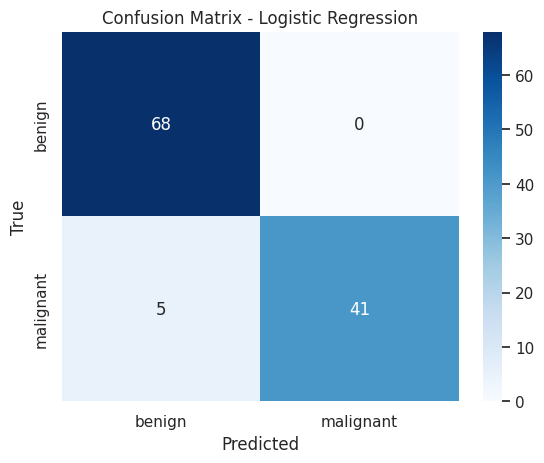

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        68
           M       1.00      0.89      0.94        46

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



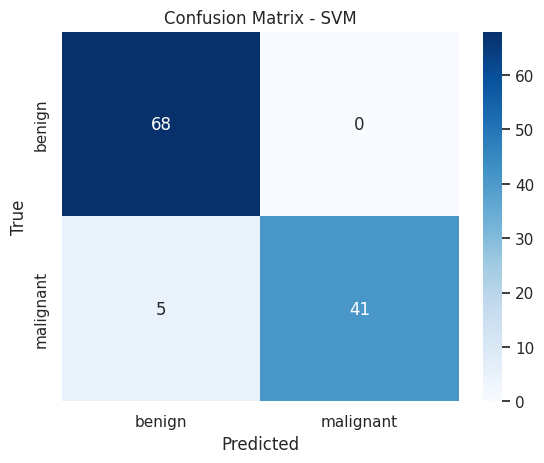

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        68
           M       1.00      0.89      0.94        46

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



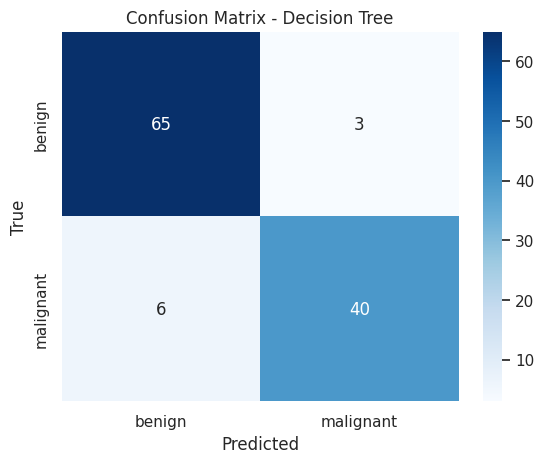

              precision    recall  f1-score   support

           B       0.92      0.96      0.94        68
           M       0.93      0.87      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



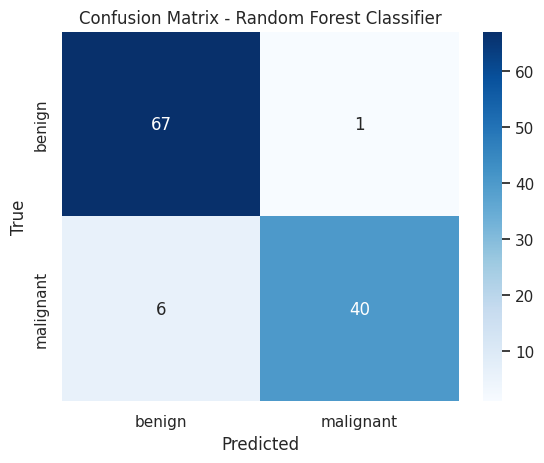

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        68
           M       0.98      0.87      0.92        46

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [116]:
def Classification_Draw(models, X_test, y_test):
    # Define class names
    class_names = ['benign', 'malignant']

    for model, model_name in models:
        # Calculate the confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        print(classification_report(y_test,y_pred))

# Assuming you have a list of models and their names
models = [(final_LR_model, 'Logistic Regression'),
          (final_SVM_model, 'SVM'),
          (final_Tree_model, 'Decision Tree'),
          (final_RFC_model, 'Random Forest Classifier')]

# Call the function to generate confusion matrix plots
Classification_Draw(models, X_test, y_test)


## 3.3.Building Model With Chi Square test

In [117]:
shuffled_data = Breast_Data_Frame.sample(frac=1,random_state=42)
features = shuffled_data.drop(columns=["diagnosis"])
target = shuffled_data["diagnosis"]
print(features.shape,target.shape,sep="\n")

(569, 30)
(569,)


In [118]:
p_values = chi2(features, target)[1]
p_values = pd.Series(p_values, index=features.columns)
p_values

radius_mean                 8.013976e-60
texture_mean                3.322922e-22
perimeter_mean              0.000000e+00
area_mean                   0.000000e+00
smoothness_mean             6.986316e-01
compactness_mean            2.010130e-02
concavity_mean              9.001757e-06
concave points_mean         1.165636e-03
symmetry_mean               6.119260e-01
fractal_dimension_mean      9.931222e-01
radius_se                   3.895534e-09
texture_se                  9.211682e-01
perimeter_se                1.948775e-56
area_se                     0.000000e+00
smoothness_se               9.544251e-01
compactness_se              4.333661e-01
concavity_se                3.067268e-01
concave points_se           5.806211e-01
symmetry_se                 9.928474e-01
fractal_dimension_se        9.363798e-01
radius_worst               6.113248e-109
texture_worst               7.896683e-40
perimeter_worst             0.000000e+00
area_worst                  0.000000e+00
smoothness_worst

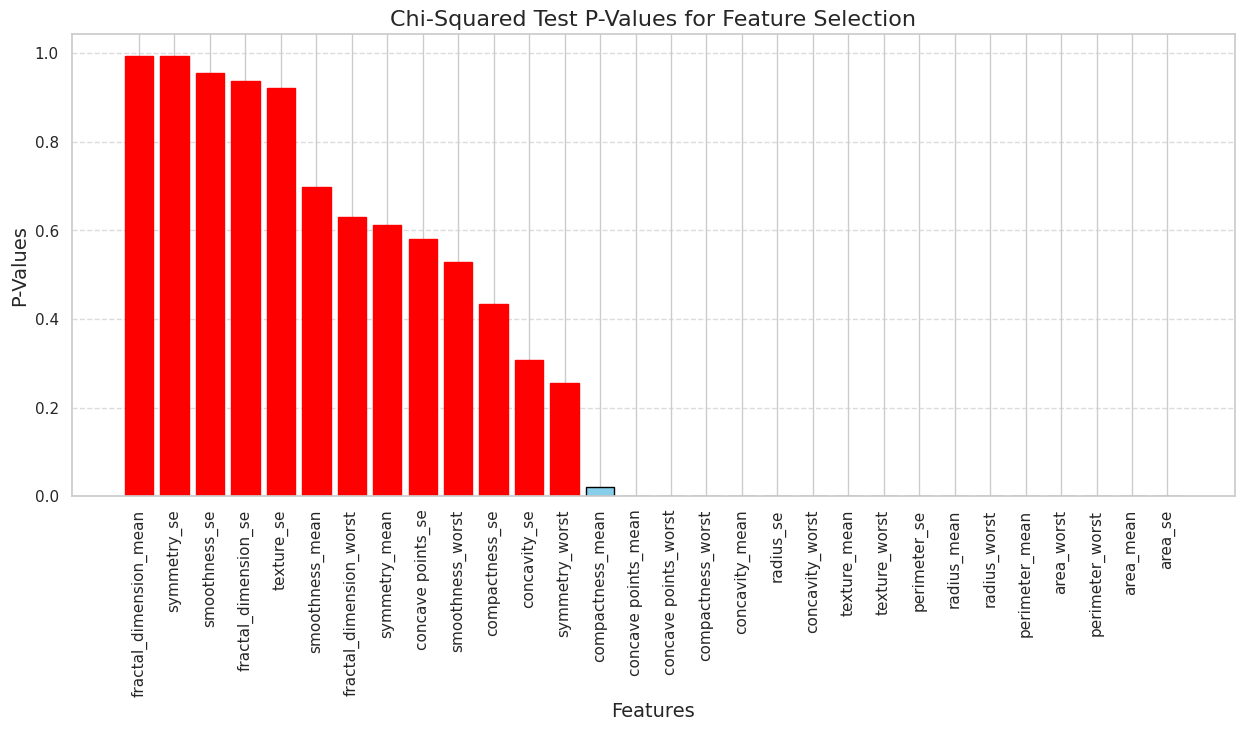

In [119]:
# Sort p-values in descending order
p_values.sort_values(ascending=False, inplace=True)
# Plot the bar chart
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
bars = plt.bar(p_values.index, p_values.values, color='skyblue', edgecolor='black')

# Highlight bars with p-values higher than 0.05 in red
for bar, p_value in zip(bars, p_values):
    if p_value > 0.05:
        bar.set_color('red')

# Add labels and title
plt.title('Chi-Squared Test P-Values for Feature Selection', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('P-Values', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show plot
plt.show()


In [120]:
p_values.head(14).index.to_list()

['fractal_dimension_mean',
 'symmetry_se',
 'smoothness_se',
 'fractal_dimension_se',
 'texture_se',
 'smoothness_mean',
 'fractal_dimension_worst',
 'symmetry_mean',
 'concave points_se',
 'smoothness_worst',
 'compactness_se',
 'concavity_se',
 'symmetry_worst',
 'compactness_mean']

In [121]:
Rejected_Columns = p_values.head(14).index.to_list()
New_Features = features.drop(columns=Rejected_Columns)

In [122]:
X_train,X_test,y_train,y_test = train_test_split(New_Features,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")

(455, 16)
(114, 16)
(455,)
(114,)


In [123]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [124]:
def Model(X_train, y_train):
    # 1- Logistic Regression
    LR = LogisticRegression(max_iter=1000, random_state=1)
    LR_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    LR_grid = GridSearchCV(LR, LR_params, cv=5)
    LR_grid.fit(X_train, y_train)
    best_LR_model = LR_grid.best_estimator_

    # 2- SVM
    SVM = SVC(random_state=7)
    SVM_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    SVM_grid = GridSearchCV(SVM, SVM_params, cv=5)
    SVM_grid.fit(X_train, y_train)
    best_SVM_model = SVM_grid.best_estimator_

    # 3- Decision Tree
    Tree = DecisionTreeClassifier(random_state=7, criterion="entropy")
    Tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    Tree_grid = GridSearchCV(Tree, Tree_params, cv=5)
    Tree_grid.fit(X_train, y_train)
    best_Tree_model = Tree_grid.best_estimator_

    # 4- Random Forest Classifier
    RFC = RandomForestClassifier(random_state=7, criterion="entropy")
    RFC_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    RFC_grid = GridSearchCV(RFC, RFC_params, cv=5)
    RFC_grid.fit(X_train, y_train)
    best_RFC_model = RFC_grid.best_estimator_

    # Print scores and best parameters for all models
    print(f"Score of Logistic Regression is {LR_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_LR_model}\'")
    print(f"Score of SVM is {SVM_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_SVM_model}\'")
    print(f"Score of Decision Tree is {Tree_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_Tree_model}\'")
    print(f"Score of Random Forest Classifier is {RFC_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_RFC_model}\'")

    return best_LR_model, best_SVM_model, best_Tree_model, best_RFC_model

In [125]:
final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model = Model(X_train, y_train)

Score of Logistic Regression is 97.14% and best parameters were 'LogisticRegression(C=1, max_iter=1000, random_state=1)'
Score of SVM is 98.68% and best parameters were 'SVC(C=10, random_state=7)'
Score of Decision Tree is 100.00% and best parameters were 'DecisionTreeClassifier(criterion='entropy', random_state=7)'
Score of Random Forest Classifier is 100.00% and best parameters were 'RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)'


In [126]:
def Test_Results(LR, SVM, TRE, RFC, X_test, y_test):
    # 1. LR Model Test Score
    Score_Of_LR = LR.score(X_test, y_test)
    print(f"LR Model Test Score: {Score_Of_LR:0.2%}")

    # 2. SVM Model Test Score
    Score_Of_SVM = SVM.score(X_test, y_test)
    print(f"SVM Model Test Score: {Score_Of_SVM:0.2%}")

    # 3. Decision Tree Model Test Score
    Score_Of_DT = TRE.score(X_test, y_test)
    print(f"Decision Tree Model Test Score: {Score_Of_DT:0.2%}")

    # 4. Random Forest Classifier Model Test Score
    Score_Of_RFC = RFC.score(X_test, y_test)
    print(f"Random Forest Classifier Model Test Score: {Score_Of_RFC:0.2%}")


In [127]:
Test_Results(final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model,X_test,y_test)

LR Model Test Score: 95.61%
SVM Model Test Score: 94.74%
Decision Tree Model Test Score: 91.23%
Random Forest Classifier Model Test Score: 93.86%


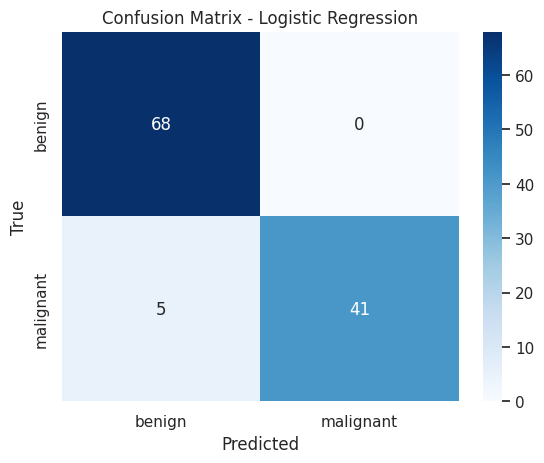

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        68
           M       1.00      0.89      0.94        46

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



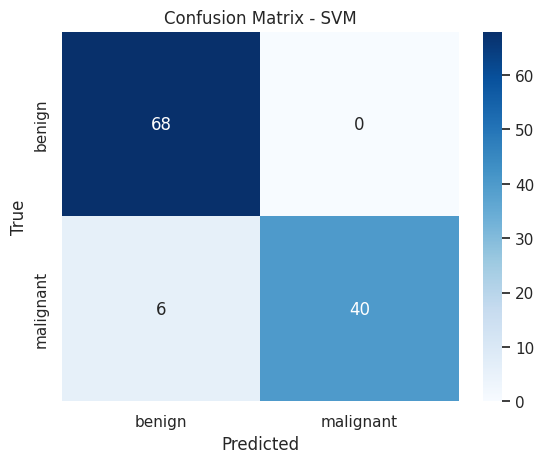

              precision    recall  f1-score   support

           B       0.92      1.00      0.96        68
           M       1.00      0.87      0.93        46

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



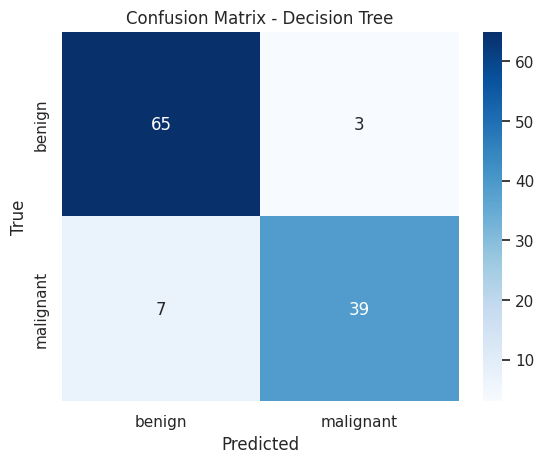

              precision    recall  f1-score   support

           B       0.90      0.96      0.93        68
           M       0.93      0.85      0.89        46

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



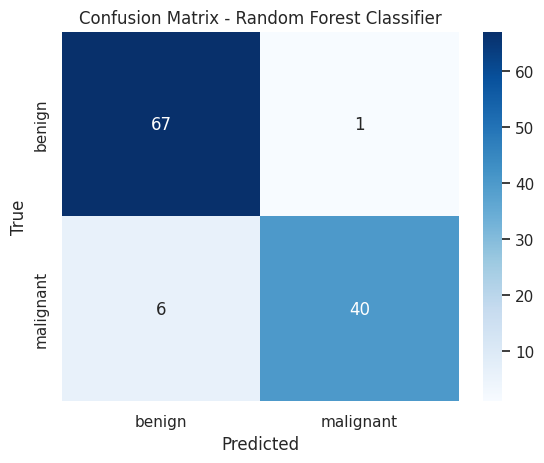

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        68
           M       0.98      0.87      0.92        46

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [128]:
def Classification_Draw(models, X_test, y_test):
    # Define class names
    class_names = ['benign', 'malignant']

    for model, model_name in models:
        # Calculate the confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        print(classification_report(y_test,y_pred))

# Assuming you have a list of models and their names
models = [(final_LR_model, 'Logistic Regression'),
          (final_SVM_model, 'SVM'),
          (final_Tree_model, 'Decision Tree'),
          (final_RFC_model, 'Random Forest Classifier')]

# Call the function to generate confusion matrix plots
Classification_Draw(models, X_test, y_test)


## 3.4.Building Model Without Decomposition Reduction

In [129]:
shuffled_data = Breast_Data_Frame.sample(frac=1,random_state=42)
features = shuffled_data.drop(columns=["diagnosis"])
target = shuffled_data["diagnosis"]
print(features.shape,target.shape,sep="\n")

(569, 30)
(569,)


In [130]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")

(455, 30)
(114, 30)
(455,)
(114,)


In [131]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [132]:
def Model(X_train, y_train):
    # 1- Logistic Regression
    LR = LogisticRegression(max_iter=1000, random_state=1)
    LR_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    LR_grid = GridSearchCV(LR, LR_params, cv=5)
    LR_grid.fit(X_train, y_train)
    best_LR_model = LR_grid.best_estimator_

    # 2- SVM
    SVM = SVC(random_state=7)
    SVM_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    SVM_grid = GridSearchCV(SVM, SVM_params, cv=5)
    SVM_grid.fit(X_train, y_train)
    best_SVM_model = SVM_grid.best_estimator_

    # 3- Decision Tree
    Tree = DecisionTreeClassifier(random_state=7, criterion="entropy")
    Tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    Tree_grid = GridSearchCV(Tree, Tree_params, cv=5)
    Tree_grid.fit(X_train, y_train)
    best_Tree_model = Tree_grid.best_estimator_

    # 4- Random Forest Classifier
    RFC = RandomForestClassifier(random_state=7, criterion="entropy")
    RFC_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    RFC_grid = GridSearchCV(RFC, RFC_params, cv=5)
    RFC_grid.fit(X_train, y_train)
    best_RFC_model = RFC_grid.best_estimator_

    # Print scores and best parameters for all models
    print(f"Score of Logistic Regression is {LR_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_LR_model}\'")
    print(f"Score of SVM is {SVM_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_SVM_model}\'")
    print(f"Score of Decision Tree is {Tree_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_Tree_model}\'")
    print(f"Score of Random Forest Classifier is {RFC_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_RFC_model}\'")

    return best_LR_model, best_SVM_model, best_Tree_model, best_RFC_model

In [133]:
final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model = Model(X_train, y_train)

Score of Logistic Regression is 98.90% and best parameters were 'LogisticRegression(C=1, max_iter=1000, random_state=1)'
Score of SVM is 98.46% and best parameters were 'SVC(C=0.1, kernel='linear', random_state=7)'
Score of Decision Tree is 99.12% and best parameters were 'DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=7)'
Score of Random Forest Classifier is 100.00% and best parameters were 'RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)'


In [134]:
def Test_Results(LR, SVM, TRE, RFC, X_test, y_test):
    # 1. LR Model Test Score
    Score_Of_LR = LR.score(X_test, y_test)
    print(f"LR Model Test Score: {Score_Of_LR:0.2%}")

    # 2. SVM Model Test Score
    Score_Of_SVM = SVM.score(X_test, y_test)
    print(f"SVM Model Test Score: {Score_Of_SVM:0.2%}")

    # 3. Decision Tree Model Test Score
    Score_Of_DT = TRE.score(X_test, y_test)
    print(f"Decision Tree Model Test Score: {Score_Of_DT:0.2%}")

    # 4. Random Forest Classifier Model Test Score
    Score_Of_RFC = RFC.score(X_test, y_test)
    print(f"Random Forest Classifier Model Test Score: {Score_Of_RFC:0.2%}")


In [135]:
Test_Results(final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model,X_test,y_test)

LR Model Test Score: 94.74%
SVM Model Test Score: 95.61%
Decision Tree Model Test Score: 93.86%
Random Forest Classifier Model Test Score: 92.98%


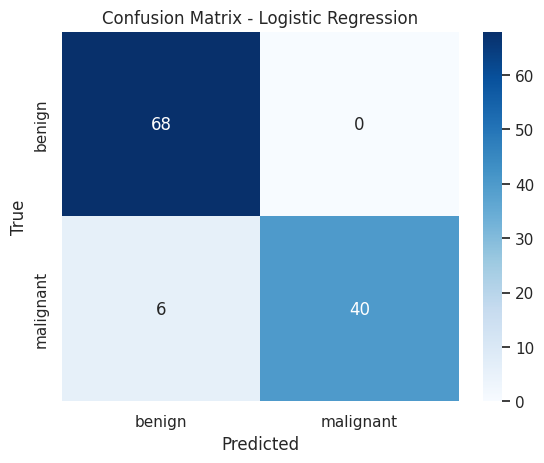

              precision    recall  f1-score   support

           B       0.92      1.00      0.96        68
           M       1.00      0.87      0.93        46

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



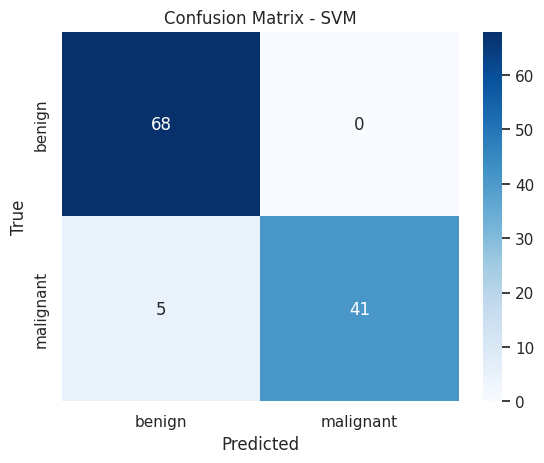

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        68
           M       1.00      0.89      0.94        46

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



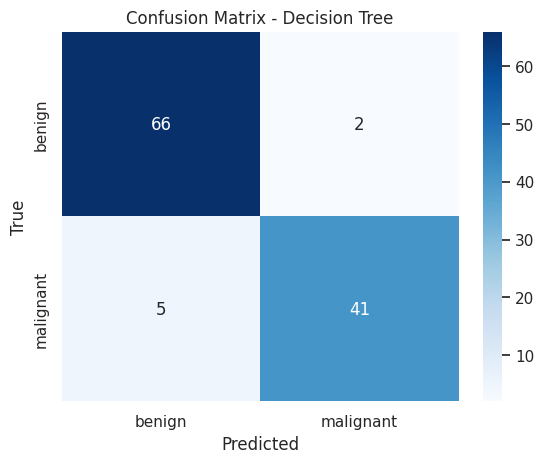

              precision    recall  f1-score   support

           B       0.93      0.97      0.95        68
           M       0.95      0.89      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



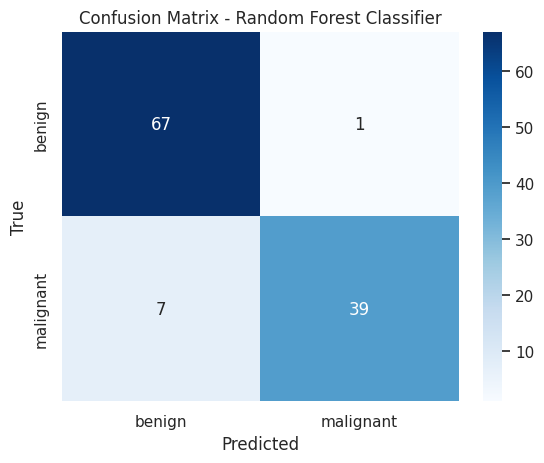

              precision    recall  f1-score   support

           B       0.91      0.99      0.94        68
           M       0.97      0.85      0.91        46

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [136]:
def Classification_Draw(models, X_test, y_test):
    # Define class names
    class_names = ['benign', 'malignant']

    for model, model_name in models:
        # Calculate the confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        print(classification_report(y_test,y_pred))

# Assuming you have a list of models and their names
models = [(final_LR_model, 'Logistic Regression'),
          (final_SVM_model, 'SVM'),
          (final_Tree_model, 'Decision Tree'),
          (final_RFC_model, 'Random Forest Classifier')]

# Call the function to generate confusion matrix plots
Classification_Draw(models, X_test, y_test)


## 3.5.Building Model in Neural Network

In [137]:
shuffled_data = Breast_Data_Frame.sample(frac=1,random_state=42)
features = shuffled_data.drop(columns=["diagnosis"])
target = LabelEncoder().fit_transform(target)
print(features.shape,target.shape,sep="\n")

(569, 30)
(569,)


In [138]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")

(455, 30)
(114, 30)
(455,)
(114,)


In [139]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [140]:
#model building
Neural=Sequential()
# First Layer
Neural.add(Dense(32,activation='relu',input_dim=X_train.shape[1]))
# Preventing Overfitting
Neural.add(Dropout(0.5))
# Another Layer
Neural.add(Dense(32,activation='relu'))
# Another Layer
Neural.add(Dense(16,activation='relu'))
# Another One
Neural.add(Dense(8,activation='relu'))
# Last Layer
Neural.add(Dense(1,activation='sigmoid'))

Neural.compile(optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy'],loss='binary_crossentropy')

history=Neural.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2)

Epoch 1/50
12/12 [==============================] - 2s 24ms/step - loss: 0.8257 - accuracy: 0.3571 - val_loss: 0.6357 - val_accuracy: 0.4945
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6618 - accuracy: 0.5192 - val_loss: 0.5551 - val_accuracy: 0.9011
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5824 - accuracy: 0.7747 - val_loss: 0.4835 - val_accuracy: 0.9670
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5131 - accuracy: 0.8819 - val_loss: 0.4100 - val_accuracy: 0.9670
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.4074 - accuracy: 0.9148 - val_loss: 0.3270 - val_accuracy: 0.9670
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3604 - accuracy: 0.9313 - val_loss: 0.2498 - val_accuracy: 0.9780
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2871 - accuracy: 0.9203 - val_loss: 0.1854 - val_accuracy: 0.9780
Epoch 8/50
12/12 [=

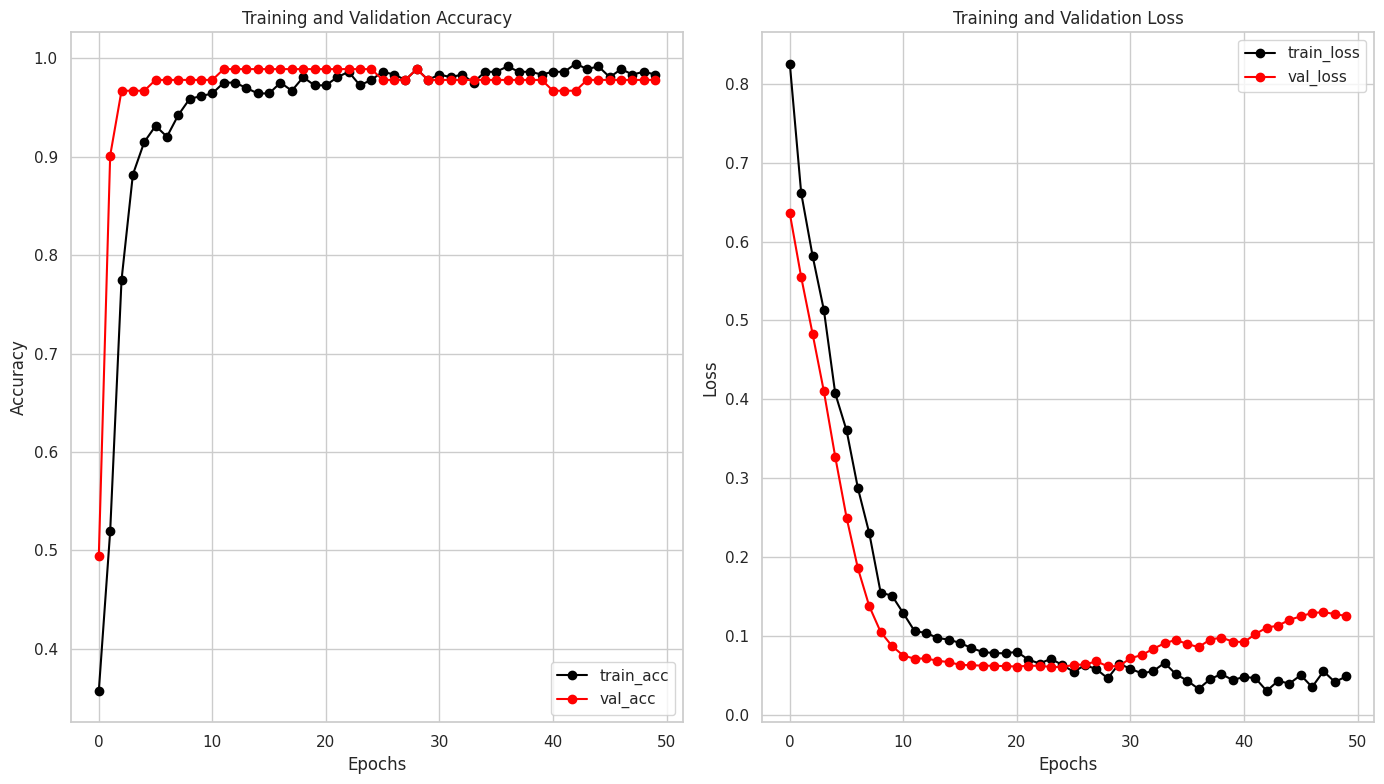

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
epochs_ = np.arange(50)

# Plot training and validation accuracy
ax[0].plot(epochs_, history.history['accuracy'], '-o', color='black', label='train_acc')
ax[0].plot(epochs_, history.history['val_accuracy'], '-o', color='red', label='val_acc')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot training and validation loss
ax[1].plot(epochs_, history.history['loss'], '-o', color='black', label='train_loss')
ax[1].plot(epochs_, history.history['val_loss'], 'r-o', color='red', label='val_loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [142]:
test_loss, test_acc = Neural.evaluate(X_test, y_test)
# benign is 0, and malignant is 1
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9561
Test loss: 0.15868324041366577
Test accuracy: 0.9561403393745422


4/4 [==============================] - 0s 6ms/step


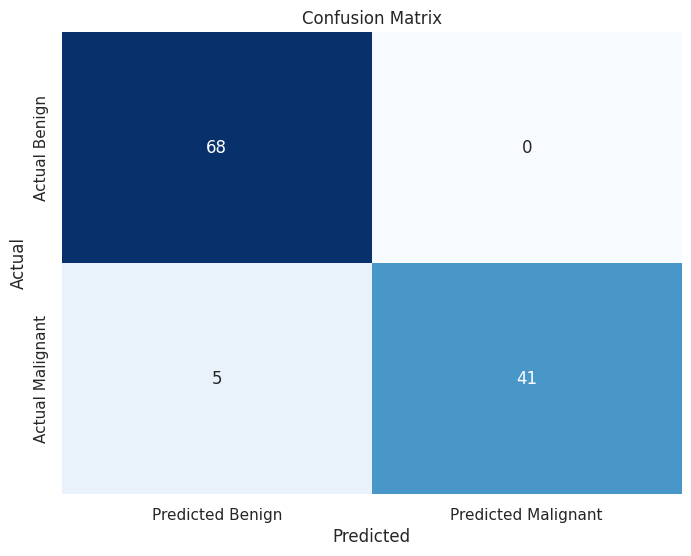

In [156]:
# Making predictions on the test set
y_pred = Neural.predict(X_test)

# Displaying the classification report
report = confusion_matrix(y_test,(y_pred > 0.5).astype(int))
# Plotting the confusion matrix as a heatmap with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Benign", "Predicted Malignant"],
            yticklabels=["Actual Benign", "Actual Malignant"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [143]:
import random
data = random.choice(X_test)
data = data.reshape(1, -1)  # Adjust the shape if necessary
test_pred = Neural.predict(data)
# Display the predictions based on the threshold of 0.5
print("Predictions:")
if test_pred >= 0.5:
      print(test_pred)
      print("Malignant")
else:
      print(test_pred)
      print("Benign")

1/1 [==============================] - 0s 101ms/step
Predictions:
[[0.9999335]]
Malignant


## we are going to focus on decreasing type 1 error which is false positive
### which means that if my patient is malignant and the model says no he is benign, so it's trouble!\
#### Random forest isn't that great sadly, becuase he said that there's 7 people are fine, but it isn't
#### Logistic also detected 6
#### will make compare between Decision tree and SVM, and the error of SVM was lower than Decision tree even in Error 1 detection
## we can take that best model of all was SVM with testing accuracy about 95%, and Neural Network with 96%

In [144]:
import pickle
# Save the SVM model to a file using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(final_SVM_model, file)
# Now, your SVM model is saved to a file named 'svm_model.pkl'
# Save the Neural model to a file using pickle
with open('Neural_Model.pkl', 'wb') as file:
    pickle.dump(Neural, file)
# Now, your Neural model is saved to a file named 'Neural_Model.pkl'